In [1]:
import plotnine
import qgrid
from tidyspotify import get_artist_audio_features
from plotnine import *

import warnings
warnings.simplefilter("ignore")

qgrid.set_grid_option("forceFitColumns", False)
plotnine.options.figure_size = (8, 4.8)
plotnine.theme_set(theme_grey())

Login to Spotify
---------------------

If you haven't saved your spotify credentials, uncomment the line below.

See [this spotify guide](https://developer.spotify.com/documentation/general/guides/app-settings/) for instructions on how to get them.

In [2]:
#tidyspotify.save_credentials()

## View Data


In [3]:
artist = get_artist_audio_features('the beatles')
qgrid.show_grid(artist.head())

QgridWidget(grid_options={'maxVisibleRows': 15, 'enableColumnReorder': False, 'autoEdit': False, 'minVisibleRo…

In [4]:
artist.to_csv('spotify_beatles.csv')

## Energy vs Valence

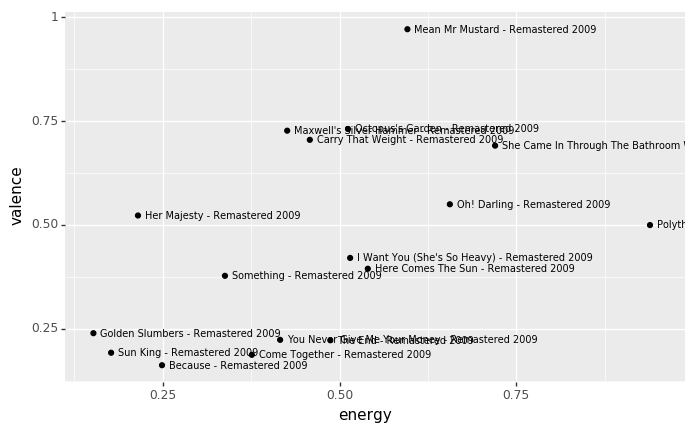

<ggplot: (-9223372036562538857)>

In [5]:
album = (artist
        .query("album_name == 'Abbey Road (Remastered)'")
        )
         
(ggplot(album, aes('energy', 'valence'))
        + geom_point()
        + geom_text(aes(label = 'track_name'), ha = 'left', size = 7, nudge_x = .01)
        )

## Barchart of characteristics for some songs

Below, we use the 6 most popular songs to show ratings for 4 kinds of sentiments (danceability, energy, speechiness, and valence).

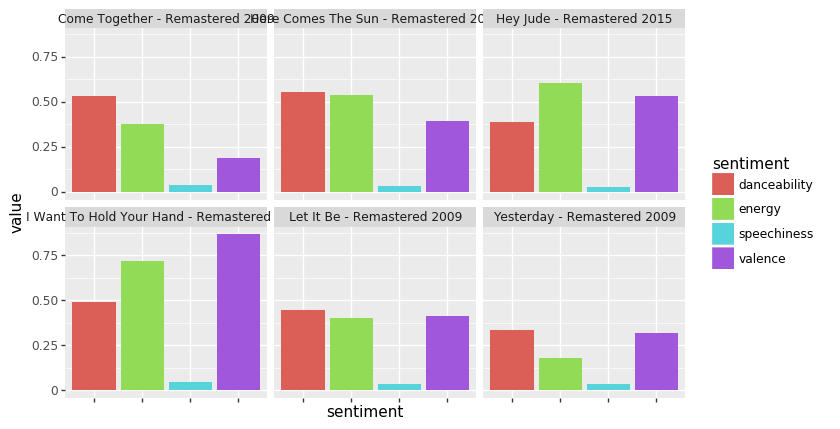

<ggplot: (292618237)>

In [6]:
top6 = (artist
        .sort_values('track_popularity', ascending = False)
        .head(6)
        .loc[:,('track_name', 'danceability', 'energy', 'speechiness', 'valence')]
        .melt('track_name', var_name = 'sentiment')
        )

(ggplot(top6, aes('sentiment', 'value', fill = 'sentiment'))
        + geom_col()
        + facet_wrap('~track_name')
        + theme(axis_text_x = element_blank()))
